In [1]:
import pandas
import datetime
import numpy
import scipy.optimize
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
%matplotlib inline
from matplotlib import rcParams

In [2]:
# some constants and cutoffs
mincutOffLosVel = 50.
maxcutOffLosVel = 2000.
mincutOffspWdth = 100.
maxcutOffspWdth = 500.
minCutOffPwr = 3.
gridSizenormMLT = 0.5
gridSizeMLAT = 0.25
minNumPntsCutoffCell = 5 # Somewhat arbitrary determination!!

In [3]:
inpCols = [ "beam", "range", "geoAzm", "magAzm", "vLos"\
           , "MLAT", "MLT", "MLON", "GLAT", "GLON", "radId"\
           , "radCode","normMLT", "normMLTRound", "spwdth", "pwr" ]
velsDataDF = pandas.read_csv("../data/apr9-840-losVels.txt")
velsDataDF.columns = inpCols
velsDataDF = velsDataDF[ (abs(velsDataDF["vLos"]) >= mincutOffLosVel) &\
                       (velsDataDF["spwdth"] >= mincutOffspWdth)&\
                       (velsDataDF["pwr"] >= minCutOffPwr)&\
                       (abs(velsDataDF["vLos"]) <= maxcutOffLosVel)&\
                       (velsDataDF["spwdth"] <= maxcutOffspWdth)].reset_index(drop=True)
velsDataDF.head()

,beam,range,geoAzm,magAzm,vLos,MLAT,MLT,MLON,GLAT,GLON,radId,radCode,normMLT,normMLTRound,spwdth,pwr
0,5,27,-41.65,-38.83,-378.1679,56.7707,2.5717,-18.7139,45.3710,-89.3080,33,bks,2.5717,2,108.6326,12.8346
1,5,28,-41.65,-39.16,-396.3842,57.0027,2.5290,-19.3536,45.6378,-89.7470,33,bks,2.5290,2,108.6326,9.4804
2,5,29,-41.65,-39.50,-379.2044,57.2309,2.4859,-20.0005,45.9024,-90.1899,33,bks,2.4859,2,108.6326,8.7086
3,5,30,-41.65,-39.85,-368.0763,57.4553,2.4423,-20.6546,46.1649,-90.6368,33,bks,2.4423,2,101.2517,7.1071
4,6,25,-37.79,-33.55,-221.1927,56.8363,2.7261,-16.3974,45.3789,-87.7046,33,bks,2.7261,2,102.3670,14.6025


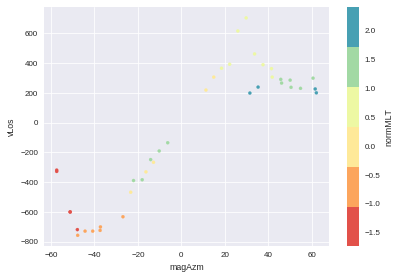

In [24]:
selLat = 58.5
delLat = 0.25
fig1 = plt.figure()
ax = fig1.add_subplot(111)
# Seaborn styling
sns.set_style("darkgrid")
sns.set_context("paper")
seaMap = ListedColormap(sns.color_palette("Spectral"))
velsDataDF[ (velsDataDF["MLAT"] >= (selLat-delLat) ) &\
          (velsDataDF["MLAT"] < (selLat+delLat) )].plot( kind='scatter',
              x='magAzm',
              y='vLos',
              c='normMLT',
              s=10., cmap=seaMap, ax=ax)
fig1.savefig("../figs/test2.pdf",bbox_inches='tight')

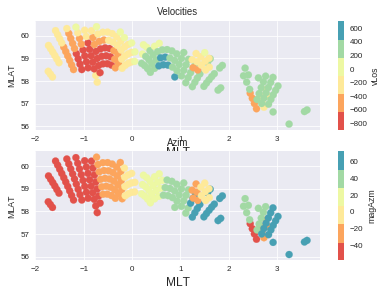

In [5]:
#### Plot the chosen SAPS velocities ####
#### Plot the chosen SAPS velocities ####
#### Plot the chosen SAPS velocities ####
# Seaborn styling
sns.set_style("darkgrid")
sns.set_context("paper")
seaMap = ListedColormap(sns.color_palette("Spectral"))
# Plot using matplotlib
fig1 = plt.figure()
ax1 = fig1.add_subplot(211)
velsDataDF.plot( kind='scatter',
              x='normMLT',
              y='MLAT',
              c='vLos',
              s=50., cmap=seaMap, ax=ax1)
ax1.set_ylabel("MLAT")
ax1.set_xlabel("MLT", fontsize=12)
ax1.set_title( "Velocities" )
ax2 = fig1.add_subplot(212)
velsDataDF.plot( kind='scatter',
              x='normMLT',
              y='MLAT',
              c='magAzm',
              s=50., cmap=seaMap, ax=ax2)
ax2.set_ylabel("MLAT")
ax2.set_xlabel("MLT", fontsize=12)
ax2.set_title( "Azim" )
# ax.set_ylim( [55., 62.] )
fig1.savefig("../figs/lShellVelsAzims.pdf",bbox_inches='tight')
# ax.get_figure().savefig("../figs/sapsVels.pdf",bbox_inches='tight')
#### Plot the chosen SAPS velocities ####
#### Plot the chosen SAPS velocities ####
#### Plot the chosen SAPS velocities ####

In [6]:
# We'll work on a creating a grid.
minLat = round( velsDataDF["MLAT"].min() )
maxLat = round( velsDataDF["MLAT"].max() )
minnormMLT = round( velsDataDF["normMLT"].min() )
maxnormMLT = round( velsDataDF["normMLT"].max() )
print minLat, maxLat, minnormMLT, maxnormMLT
print "56.0959 60.3891"

56.0 60.0 -2.0 4.0
56.0959 60.3891


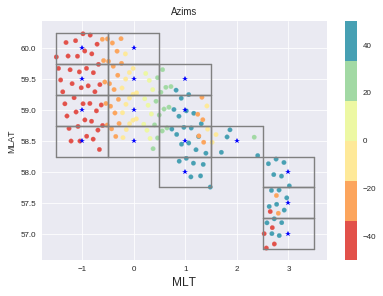

In [7]:
sns.set_style("darkgrid")
sns.set_context("paper")
seaMap = ListedColormap(sns.color_palette("Spectral"))
# Plot using matplotlib
fig1 = plt.figure()
ax = fig1.add_subplot(111)
# velsDataDF.plot( kind='scatter',
#               x='normMLT',
#               y='MLAT',
#               c='magAzm',
#               s=20., cmap=seaMap, ax=ax)
ax.set_ylabel("MLAT")
ax.set_xlabel("MLT", fontsize=12)
ax.set_title( "Azims" )

for la in numpy.arange( minLat, maxLat+1, gridSizeMLAT*2 ):
    for ml in numpy.arange( minnormMLT, maxnormMLT+1, gridSizenormMLT*2 ):
        dfSel = velsDataDF[ (velsDataDF["MLAT"] >= la - gridSizeMLAT) &\
                              (velsDataDF["MLAT"] < la + gridSizeMLAT) &\
                            (velsDataDF["normMLT"] >= ml - gridSizenormMLT) &\
                              (velsDataDF["normMLT"] < ml + gridSizenormMLT)]
        if dfSel.shape[0] > minNumPntsCutoffCell:
            im = ax.scatter( dfSel["normMLT"], dfSel["MLAT"], s=20.,\
                           c=dfSel["magAzm"], marker = 'o', cmap = seaMap, vmin=-50, vmax=50 )
            ax.plot( ml, la, 'b*' )
            ax.plot( [ ml - gridSizenormMLT, ml - gridSizenormMLT ], \
                [ la - gridSizeMLAT, la + gridSizeMLAT ], '0.5' )
            ax.plot( [ ml - gridSizenormMLT, ml+gridSizenormMLT ], \
                    [ la - gridSizeMLAT, la - gridSizeMLAT ], '0.5' )

            ax.plot( [ ml - gridSizenormMLT, ml+gridSizenormMLT ], \
                    [ la + gridSizeMLAT, la + gridSizeMLAT ], '0.5' )
            ax.plot( [ ml+gridSizenormMLT, ml+gridSizenormMLT ], \
                    [ la - gridSizeMLAT, la + gridSizeMLAT ], '0.5' )
fig1.colorbar(im)
fig1.savefig("../figs/lShellAzmisgridded.pdf",bbox_inches='tight')

In [8]:
# Some fitting functions
# Fit a sine curve for a given cell
def vel_sine_func(theta, Vmax, delTheta):
    # we are working in degrees but numpy deals with radians
    # convert to radians
    return Vmax * numpy.sin( numpy.deg2rad(theta) +\
                            numpy.deg2rad(delTheta) )

def model_func(theta, Vmax, delTheta):
    vLos = Vmax * numpy.sin( numpy.deg2rad(theta) +\
                            numpy.deg2rad(delTheta) )
    return vLos

initGuess = ( 1000., 10. )

     beam  range  geoAzm  magAzm      vLos     MLAT      MLT     MLON  \
37      2     21   23.22    7.79   76.5083  59.5920   0.2340 -53.7791   
40      3     21   26.46   11.43  129.5809  59.4804   0.3029 -52.7450   
43      4     21   29.70   15.08  180.6842  59.3304   0.3698 -51.7425   
47      5     22   32.94   18.87  160.2308  59.5235   0.4634 -50.3373   
99     15     23   -8.66  -27.22 -632.0884  59.4265  23.5328 -64.2966   
104    16     22   -5.42  -23.64 -508.1474  59.3318  23.6212 -62.9707   
105    16     23   -5.42  -23.79 -298.4310  59.7088  23.6046 -63.2192   
109    17     22   -2.18  -20.19 -298.9718  59.5634  23.6922 -61.9062   
113    18     21    1.06  -16.57 -329.1862  59.3569  23.7746 -60.6703   
118    19     21    4.30  -13.05 -207.0821  59.5017  23.8455 -59.6070   
122    20     21    7.54   -9.51 -110.9781  59.6072  23.9174 -58.5283   
124    21     20   10.78   -5.87 -124.2765  59.2555  23.9883 -57.4643   
125    21     21   10.78   -5.94  -71.6980  59.6727

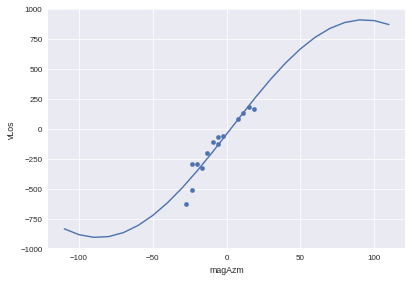

In [9]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
for la in numpy.arange( minLat, maxLat+1, gridSizeMLAT*2 ):
    for ml in numpy.arange( minnormMLT, maxnormMLT+1, gridSizenormMLT*2 ):
        dfSel = velsDataDF[ (velsDataDF["MLAT"] >= la - gridSizeMLAT) &\
                              (velsDataDF["MLAT"] < la + gridSizeMLAT) &\
                            (velsDataDF["normMLT"] >= ml - gridSizenormMLT) &\
                              (velsDataDF["normMLT"] < ml + gridSizenormMLT)]
        if ( (ml == 0) and (la == 59.5) ) :
            if dfSel.shape[0] >= 5:
                print dfSel
                popt, pcov = scipy.optimize.curve_fit(vel_sine_func, \
                        dfSel['magAzm'].T,\
                        dfSel['vLos'].T,
                       p0=initGuess)
                print "Vmax--->", popt[0],"+/-", pcov[0,0]**0.5
                print "delTheta--->", popt[1],"+/-", pcov[1,1]**0.5
                thetaArr = range(-110, 120, 10)
                vLosArr = [ round( model_func(t, popt[0],popt[1]) ) for t in thetaArr ]
                ax.plot( thetaArr, vLosArr )
                dfSel.plot( x="magAzm", y="vLos", kind="scatter", ax=ax )

58.5 1.0 58.25 58.75 0.5 1.5
     beam  range  geoAzm  magAzm      vLos     MLAT     MLT     MLON     GLAT  \
52      7     21   39.42   25.99  615.7123  58.6628  0.5540 -48.9794  50.1339   
55      8     22   42.66   29.82  703.5563  58.7117  0.6463 -47.5944  49.9892   
58      9     23   45.90   33.68  461.4401  58.6937  0.7400 -46.1881  49.7800   
61     10     24   49.14   37.57  389.2800  58.6067  0.8342 -44.7752  49.5060   
65     11     25   52.38   41.48  362.9501  58.4493  0.9279 -43.3709  49.1671   
66     11     26   52.38   41.81  305.6590  58.7206  0.9737 -42.6837  49.3556   
131    12     27   55.62   45.74  290.4995  58.4676  1.0676 -41.2746  48.9276   
132    12     28   55.62   46.11  265.7351  58.7103  1.1160 -40.5483  49.0883   
136    13     29   58.86   50.06  285.1427  58.3594  1.2085 -39.1615  48.5713   
137    13     30   58.86   50.47  237.0563  58.5719  1.2590 -38.4033  48.7035   
142    14     32   62.10   54.83  230.1657  58.3033  1.4003 -36.2841  48.2019   

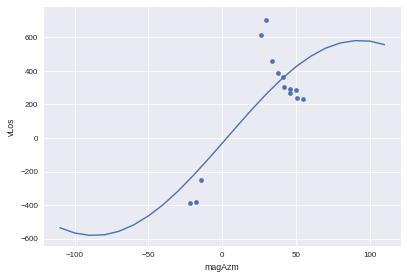

In [10]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
mlatCellSizeArr = [ 0.25 ]
mltCellSizeArr = [ .5 ]
for la in numpy.arange( minLat, maxLat+1, 0.5 ):
    for ml in numpy.arange( minnormMLT, maxnormMLT+1, 1. ):
        if (la != 58.5) or (ml != 1):
            continue
        for csLat in mlatCellSizeArr:
            for csMlt in mltCellSizeArr:
                print la, ml, la - csLat, la + csLat, ml - csMlt, ml + csMlt
                dfSel = velsDataDF[ (velsDataDF["MLAT"] >= la - csLat) &\
                                      (velsDataDF["MLAT"] < la + csLat) &\
                                    (velsDataDF["normMLT"] >= ml - csMlt) &\
                                      (velsDataDF["normMLT"] < ml + csMlt)]
                print dfSel
                popt, pcov = scipy.optimize.curve_fit(vel_sine_func, \
                        dfSel['magAzm'].T,\
                        dfSel['vLos'].T,
                       p0=initGuess)
                print "Vmax--->", popt[0],"+/-", pcov[0,0]**0.5
                print "delTheta--->", popt[1],"+/-", pcov[1,1]**0.5
                thetaArr = range(-110, 120, 10)
                vLosArr = [ round( model_func(t, popt[0],popt[1]) ) for t in thetaArr ]
                ax.plot( thetaArr, vLosArr )
                dfSel.plot( x="magAzm", y="vLos", kind="scatter", ax=ax )
fig1.savefig("../figs/test.pdf",bbox_inches='tight')

In [14]:
la = 58.5
ml = 1.
csLat = 0.25
csMlt = 0.5
dfTest = velsDataDF[ (velsDataDF["MLAT"] >= la - csLat) &\
                                      (velsDataDF["MLAT"] < la + csLat) &\
                                    (velsDataDF["normMLT"] >= ml - csMlt) &\
                                      (velsDataDF["normMLT"] < ml + csMlt)]
minAzim = int( 5 * round(dfTest["magAzm"].min()-1/5) )
maxAzim = int( 5 * round(dfTest["magAzm"].max()+1/5) )
azimBins = [ i for i in range(minAzim, maxAzim+1, 5) ]

velsAzimWiseBins = pandas.cut( dfTest["magAzm"], bins=azimBins )
dfTest["magAzimBin"] = pandas.cut( dfTest["magAzm"], bins=azimBins )
print dfTest[ ["magAzimBin", "magAzm", "vLos", "beam", "radCode"] ]
azmGrpMean = dfTest.groupby( ["magAzimBin"] ).mean().reset_index()
print azmGrpMean

     magAzimBin  magAzm      vLos  beam radCode
52     (25, 30]   25.99  615.7123     7     cve
55     (25, 30]   29.82  703.5563     8     cve
58     (30, 35]   33.68  461.4401     9     cve
61     (35, 40]   37.57  389.2800    10     cve
65     (40, 45]   41.48  362.9501    11     cve
66     (40, 45]   41.81  305.6590    11     cve
131    (45, 50]   45.74  290.4995    12     cve
132    (45, 50]   46.11  265.7351    12     cve
136    (50, 55]   50.06  285.1427    13     cve
137    (50, 55]   50.47  237.0563    13     cve
142    (50, 55]   54.83  230.1657    14     cve
154  (-25, -20]  -22.02 -388.8879    14     fhw
156  (-20, -15]  -18.03 -383.5984    15     fhw
159  (-15, -10]  -14.15 -248.1580    16     fhw
      magAzimBin  beam  range  geoAzm  magAzm      vLos      MLAT      MLT  \
0   (-110, -105]   NaN    NaN     NaN     NaN       NaN       NaN      NaN   
1   (-105, -100]   NaN    NaN     NaN     NaN       NaN       NaN      NaN   
2    (-100, -95]   NaN    NaN     NaN     NaN 

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
